In [81]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
from pytrends.request import TrendReq
import pytrends
import pandas as pd
import configparser
import logging
import sys
from logging import Formatter
from logging.handlers import RotatingFileHandler
import mysql.connector
from selenium_scrapper import selenium_scrapper
import mysql.connector
from selenium_scrapper import selenium_scrapper
import matplotlib.pyplot as plt
import time
import geopandas as gpd
import os

In [ ]:
# Пришлось закомментировать код с парсингломяндекса тк
# яндекс стал банить при использовании селениума и невозможно ничего сделать оставаясь только на капче
# Тем не менее в подтверждение можно изучить сохранившиеся при ранней работе csv файлы

In [2]:
config = configparser.RawConfigParser()
config.read('conf.ini', encoding='utf-8')

try:
    logger = logging.getLogger('logger')
    logger.setLevel(config.get('LOGGING', 'level'))
    handler = RotatingFileHandler(config.get('LOGGING', 'filename'), maxBytes=1000000, backupCount=10)
    formatter = Formatter(fmt='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%Y-%m-%d %H:%M:%S', )
    handler.setFormatter(formatter)
    logger.addHandler(handler)

    # получаем данные из файла настроек
    yandex_data = config.get('FOLDERS', 'yandex_data')  # каталог для исходящих данных
    google_data = config.get('FOLDERS', 'google_data')  # каталог для архивного хранения исходящих данных
    yandex_login = config.get('TOKENS', 'yandex_log')
    yandex_password = config.get('TOKENS', 'yandex_pass')
    selenium_executor = config.get('FOLDERS', 'selenium_executor')  # каталог с входными файлами
    create_db_sql = config.get('SQL', 'create_db')  # путь до большого скрипта необходимого при загрузке
    unis = config.get('SQL', 'unis')
    cnx = mysql.connector.connect(
        host=config.get('DB', 'host'),
        user=config.get('DB', 'user'),
        password=config.get('DB', 'sql_pass'),
        database="webscrapper"
    )  # конфиг для подключения к БД
except Exception as e:
    print('can not get params from ini, exit: {ex}'.format(ex=str(e)))

In [82]:
yandex_harvard = pd.read_csv(f"{yandex_data}{os.sep}harvard.csv")
yandex_synergy = pd.read_csv(f"{yandex_data}{os.sep}университет синергия.csv")

In [83]:
yandex_synergy

,Период,Абсолютное,Относительное
0,11.04.2022-17.04.2022,11752.0,"0,000004093262"
1,18.04.2022-24.04.2022,11007.0,"0,000003876341"
2,25.04.2022-01.05.2022,9328.0,"0,000003463586"
3,02.05.2022-08.05.2022,7131.0,"0,000002803944"
4,09.05.2022-15.05.2022,8705.0,"0,000003175733"
5,16.05.2022-22.05.2022,10950.0,"0,000003798015"
6,23.05.2022-29.05.2022,12654.0,"0,000004564023"
7,30.05.2022-05.06.2022,12856.0,"0,000004969486"
8,06.06.2022-12.06.2022,14084.0,"0,000005599495"
9,13.06.2022-19.06.2022,16265.0,"0,000006468331"


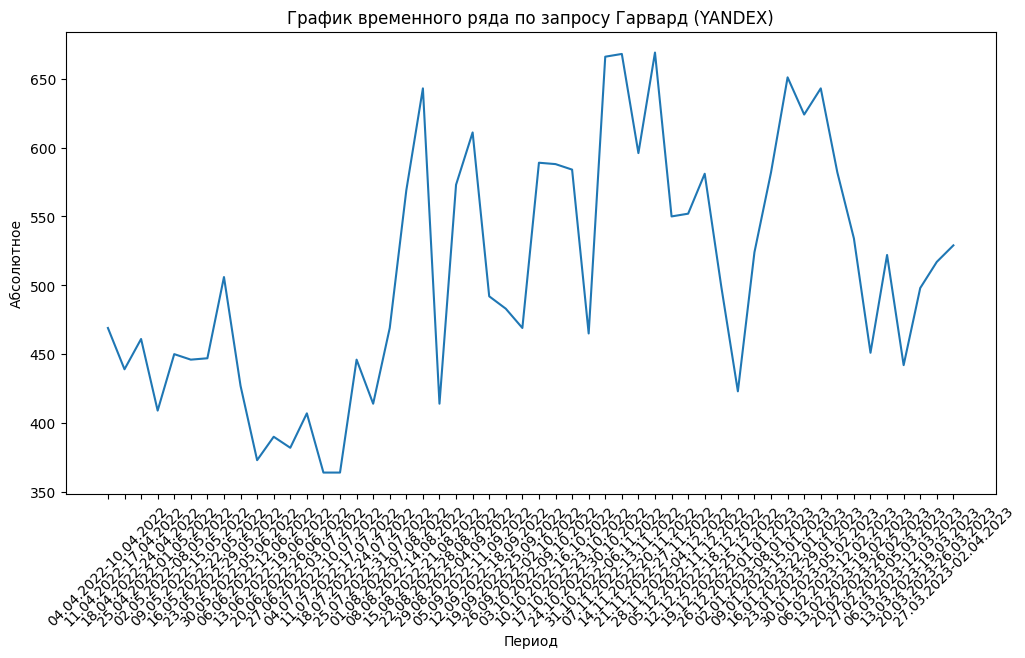

In [87]:
#  график
plt.figure(figsize=(12, 6))
plt.plot(yandex_harvard['Период'], yandex_harvard['Абсолютное'])
plt.xticks(rotation=45)
# добавить заголовок и метки осей
plt.title('График временного ряда по запросу Гарвард (YANDEX)')
plt.xlabel('Период')
plt.ylabel('Абсолютное')

# сохранить график на компьютере
plt.show()

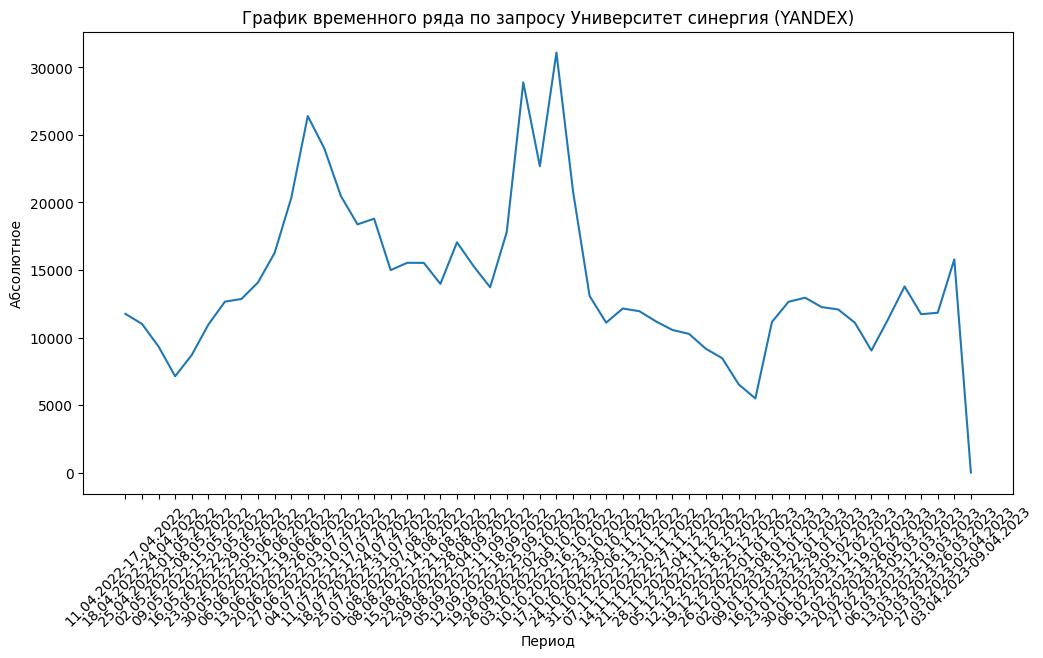

In [88]:
#  график
plt.figure(figsize=(12, 6))
plt.plot(yandex_synergy['Период'], yandex_synergy['Абсолютное'])
plt.xticks(rotation=45)
# добавить заголовок и метки осей
plt.title('График временного ряда по запросу Университет синергия (YANDEX)')
plt.xlabel('Период')
plt.ylabel('Абсолютное')

# сохранить график на компьютере
plt.show()

In [3]:
cursor = cnx.cursor()

# Execute a query
query = """
SELECT * FROM
    webscrapper.universities

"""
cursor.execute(query)

In [4]:
sql_data = list(cursor.fetchall())

In [5]:
sql_data[1][0]

'Университет боккони'

In [12]:
kw_list = []

In [13]:
for x in (sql_data):
    kw_list.append(x[1])
    print(x[0])
    selenium_scrapper(selenium_executor,x[0],yandex_login, yandex_password, yandex_data)

Гарвардский университет
Университет боккони
Лондонская школа экономики и политических наук
Парижский университет
массачусетский технологический институт
Университет Стэнфорд
Венский университет
МГУ
МФТИ
МИФИ
вшэ
Университет Эрасмус


In [21]:
kw_group = list(zip(*[iter(kw_list)]*1))
kw_grplist = [list(x) for x in kw_group]
trendshow = TrendReq(hl='en-US', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe



init_notebook_mode(connected=True)

trace = [go.Scatter(
x = trendframe.index,
y = trendframe[col], name=col) for col in trendframe.columns]

data = trace
layout = go.Layout(title='Популярность поисковых запросов к университетам 2022-09-01 - avg начало приемной для большинства вузов', showlegend=True)
fig = go.Figure(data=data, layout=layout)
fig.add_vline(x='2022-09-01', line_dash='dash', line_color='black')

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


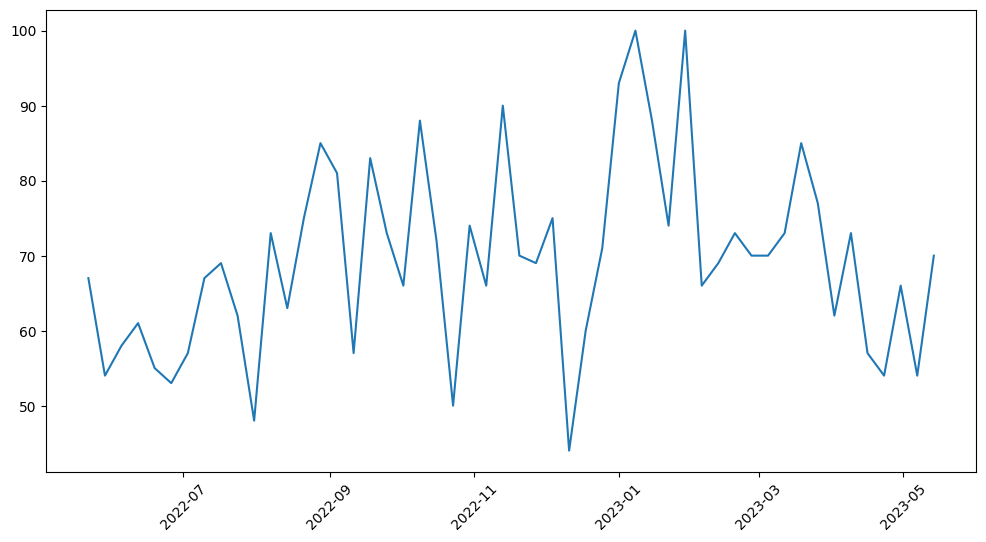

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


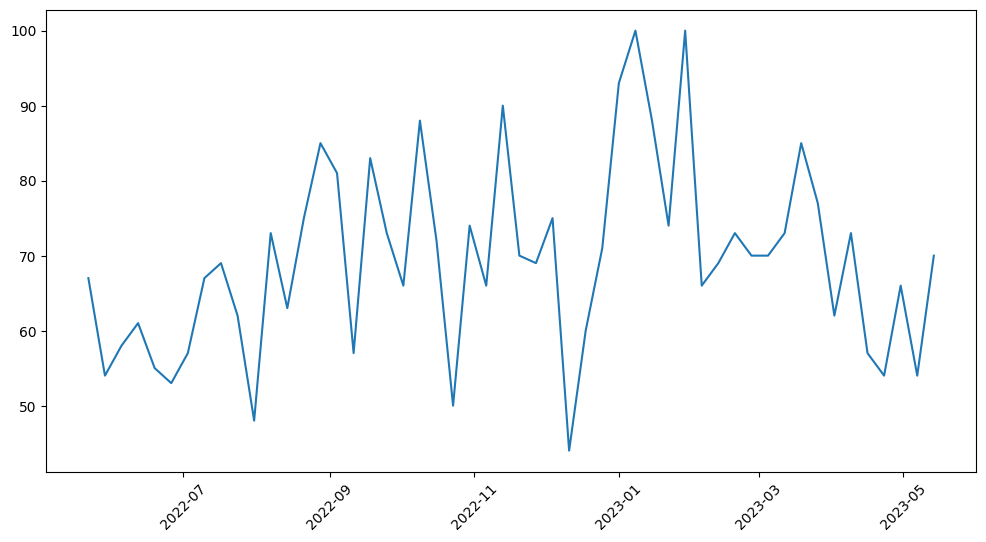

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


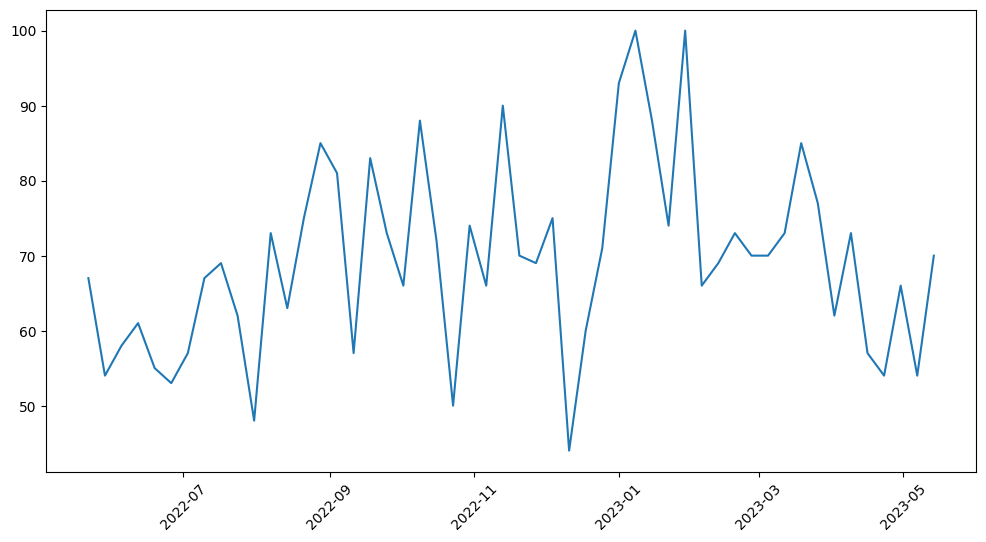

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


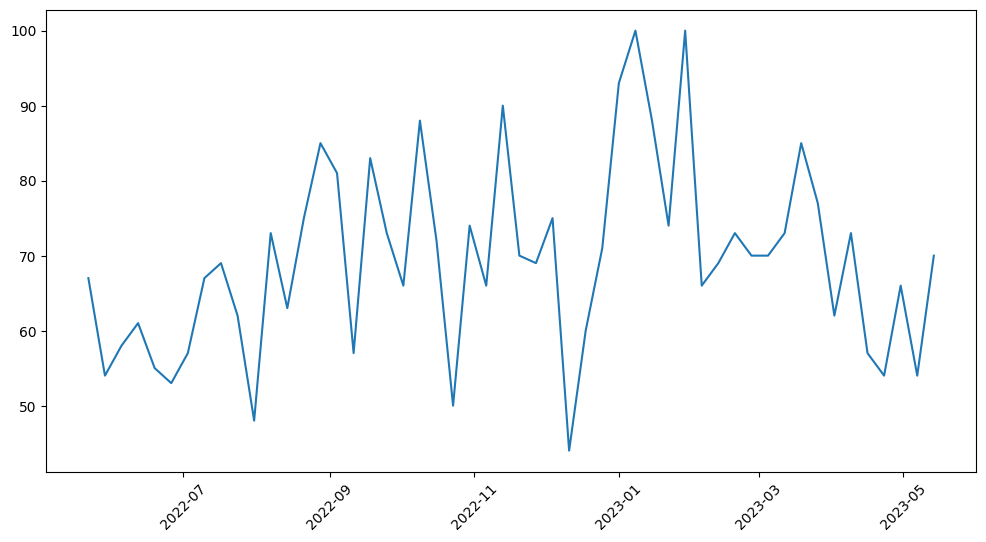

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


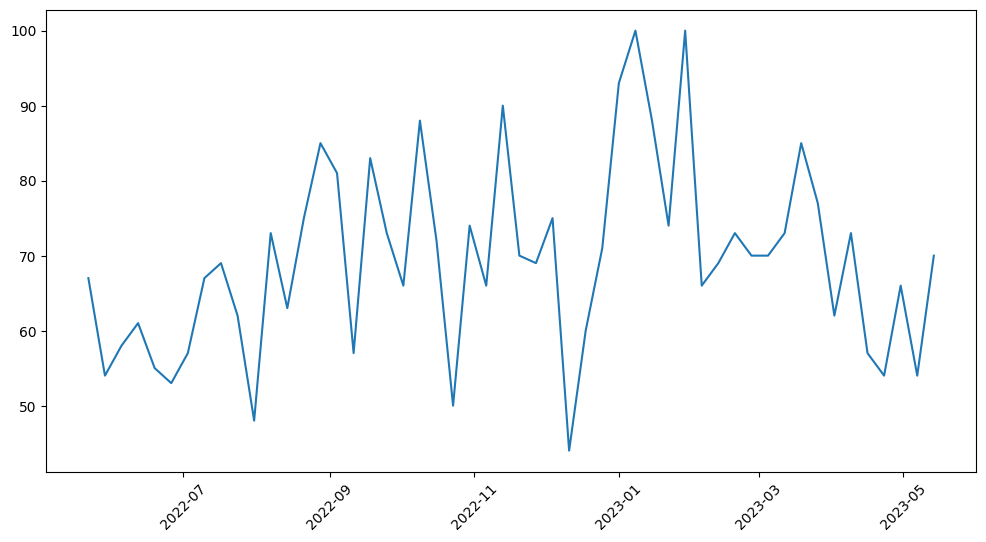

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


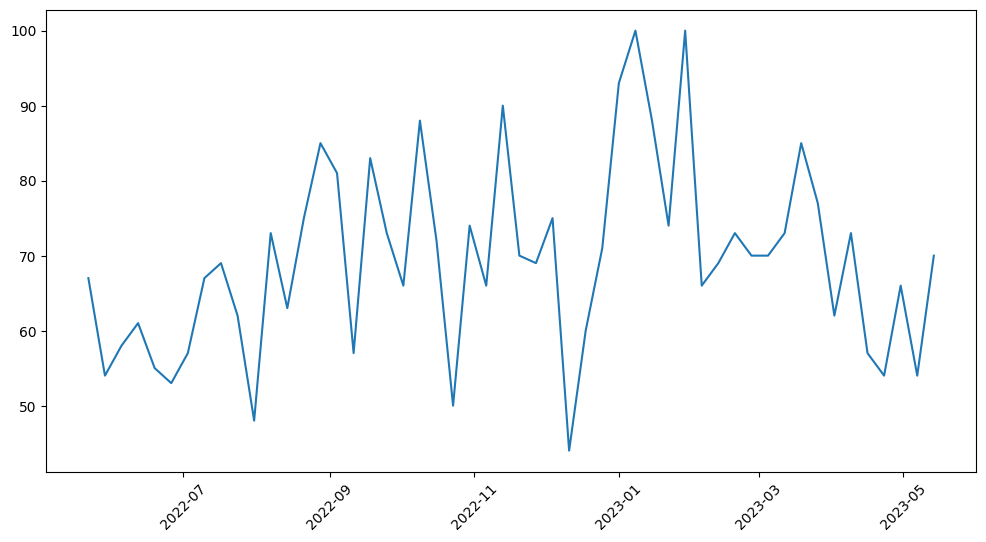

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


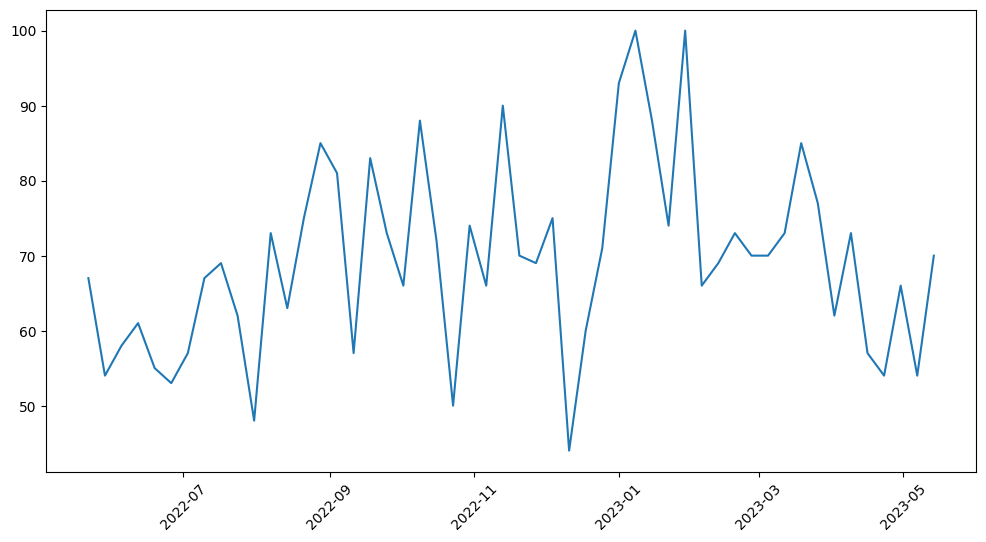

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


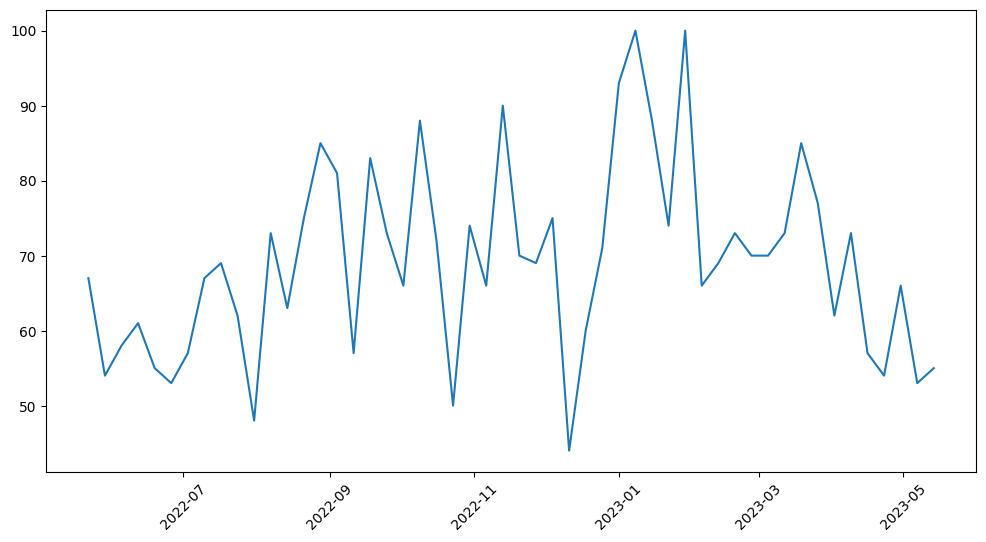

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


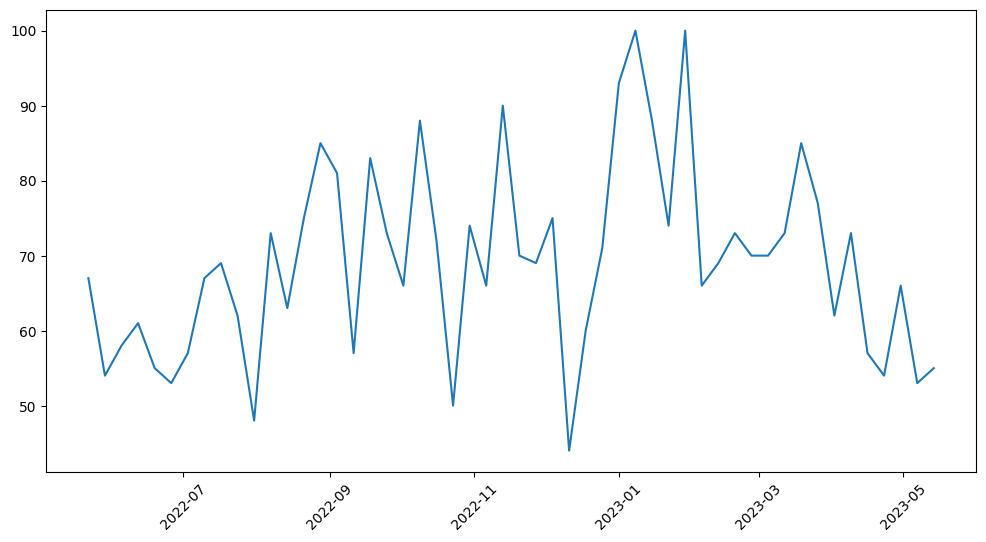

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


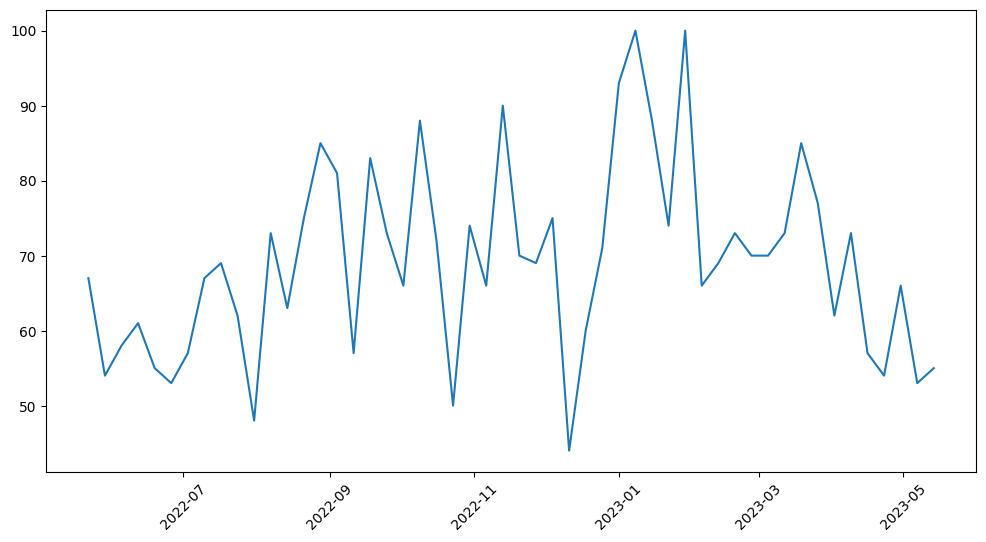

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


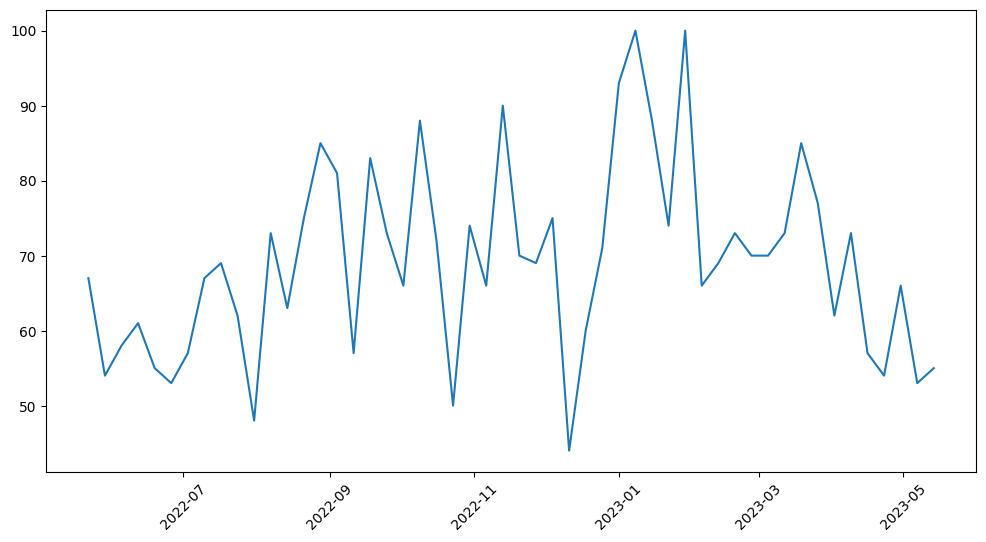

Erasmus university Rotterdam
Дата начала приемной кампании 2022-09-01


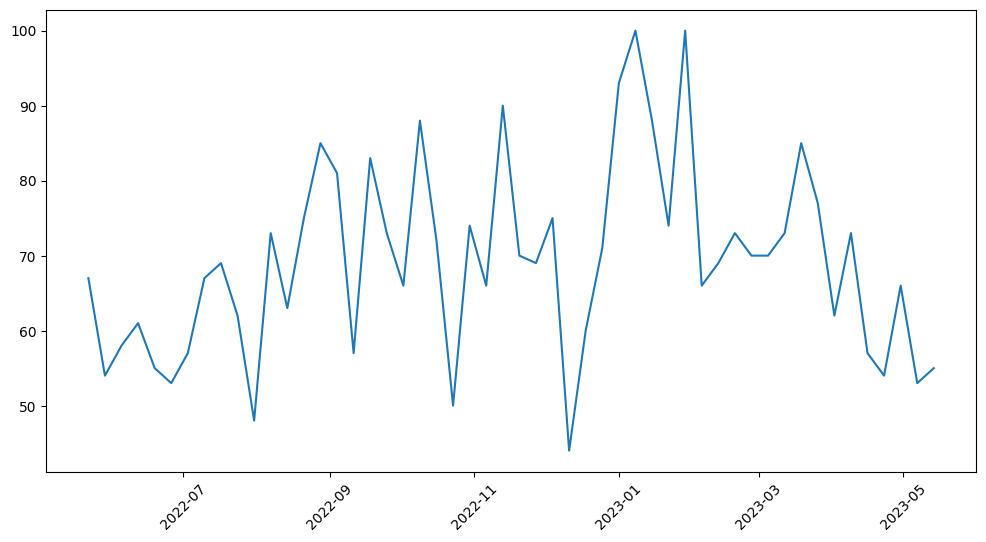

In [56]:
for univ in (sql_data):
    print(x[1])
    print("Дата начала приемной кампании "+x[3])
    pytrends = TrendReq()
    pytrends.build_payload(kw_list=[x[1]], timeframe = 'today 12-m')
    interest_over_time_df = pytrends.interest_over_time()
    data = pytrends.interest_over_time()
    plt.figure(figsize=(12, 6))
    plt.plot(interest_over_time_df.index, interest_over_time_df[x[1]])
    plt.xticks(rotation=45)
    
    plt.show()
    # Спим чтобы гугл не забанил
    time.sleep(3)

%%html
<div style="background-color: #f2f2f2; padding: 20px; font-size: 24px;">
ТК обьект карты в рамках одной ячейки не дает вырисовать много отдельных карт то хардкодом нарисуем их все
</div>

Harvard university


C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\1704941736.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



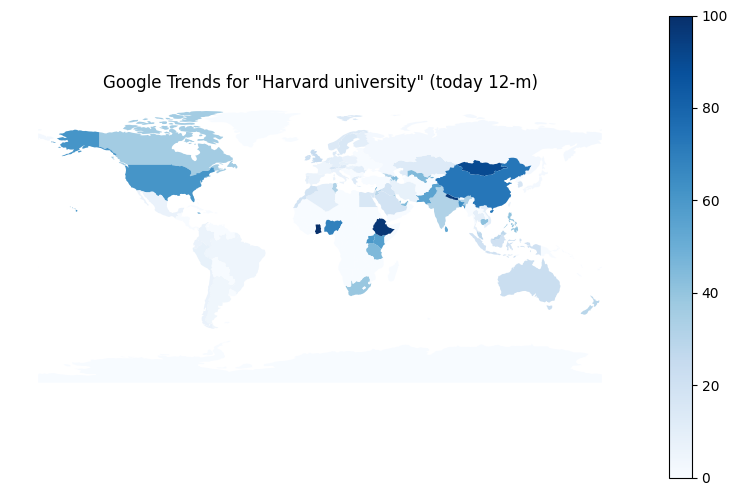

In [67]:
timeframe = 'today 12-m'
keyword = sql_data[0][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\1404146409.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



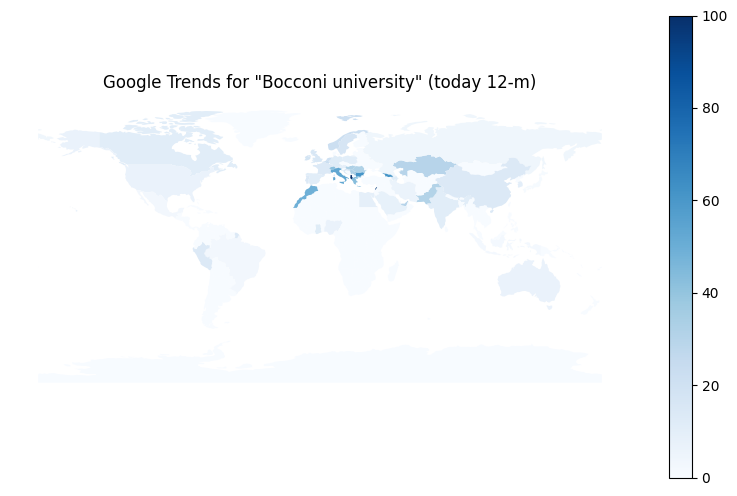

In [68]:
timeframe = 'today 12-m'
keyword = sql_data[1][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\2311554800.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



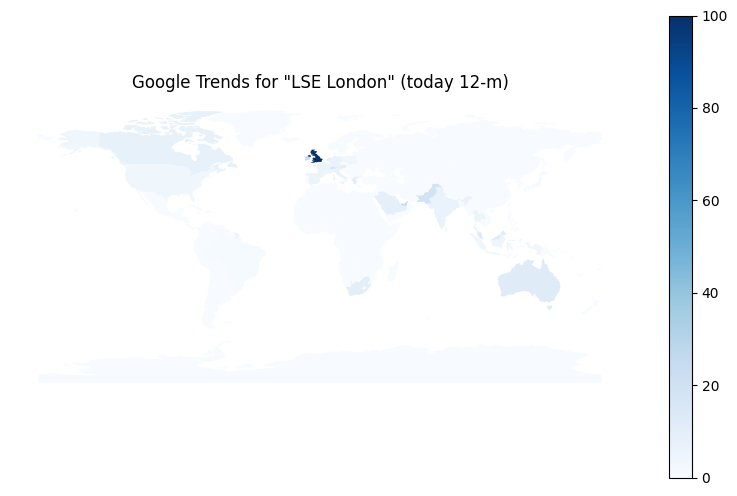

In [69]:
timeframe = 'today 12-m'
keyword = sql_data[2][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\3032639717.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



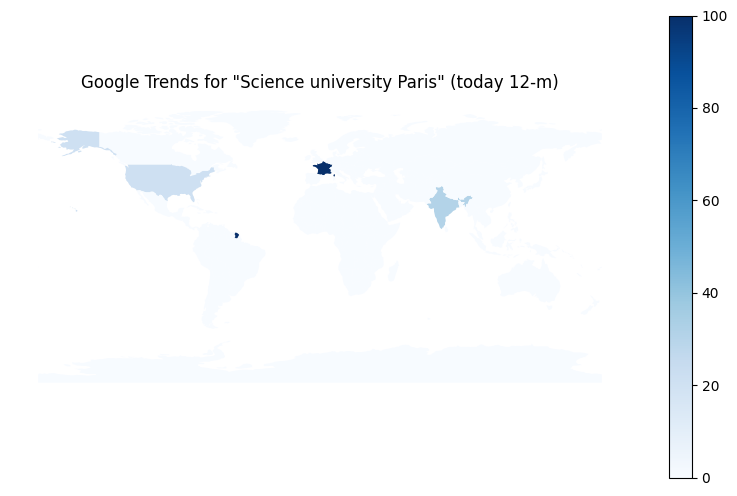

In [70]:
timeframe = 'today 12-m'
keyword = sql_data[3][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\3689273683.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



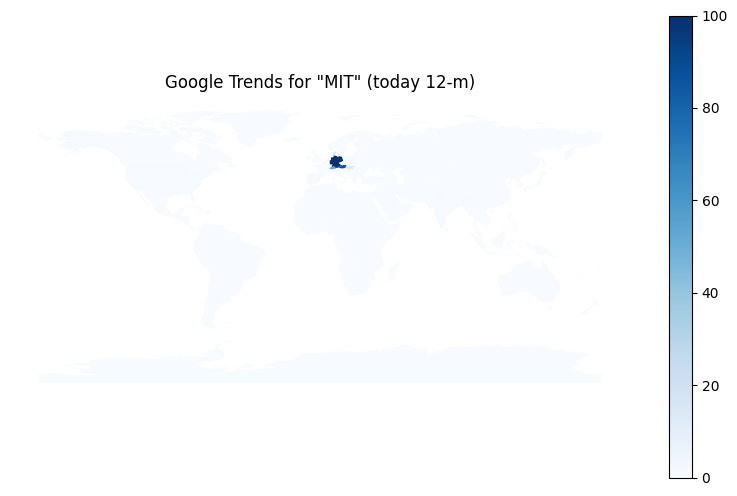

In [71]:
timeframe = 'today 12-m'
keyword = sql_data[4][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\977618603.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



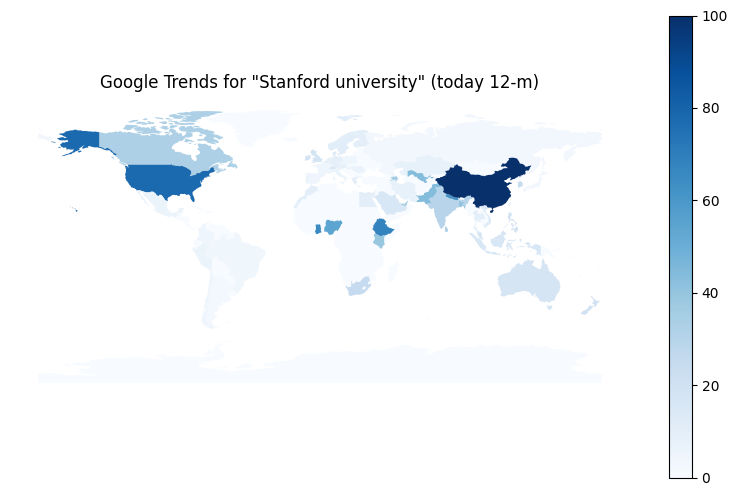

In [72]:
timeframe = 'today 12-m'
keyword = sql_data[5][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\241470280.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



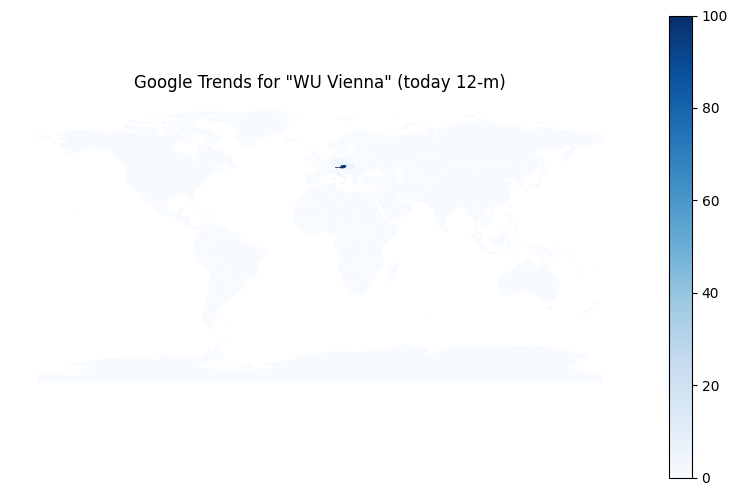

In [73]:
timeframe = 'today 12-m'
keyword = sql_data[6][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\1029640309.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



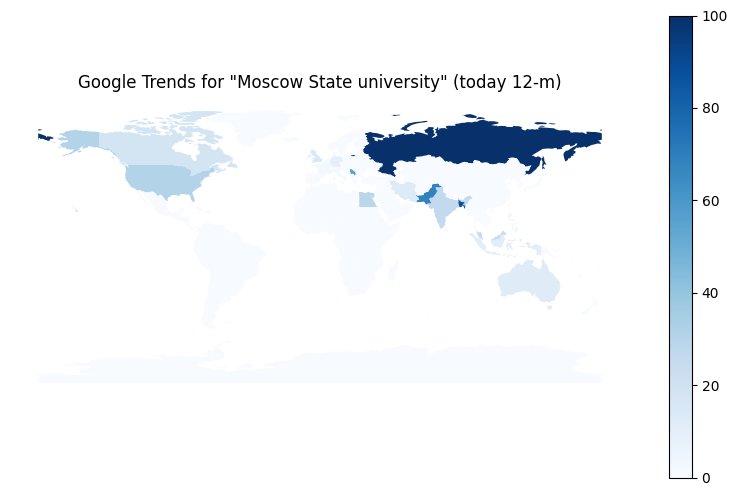

In [74]:
timeframe = 'today 12-m'
keyword = sql_data[7][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\1999017801.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



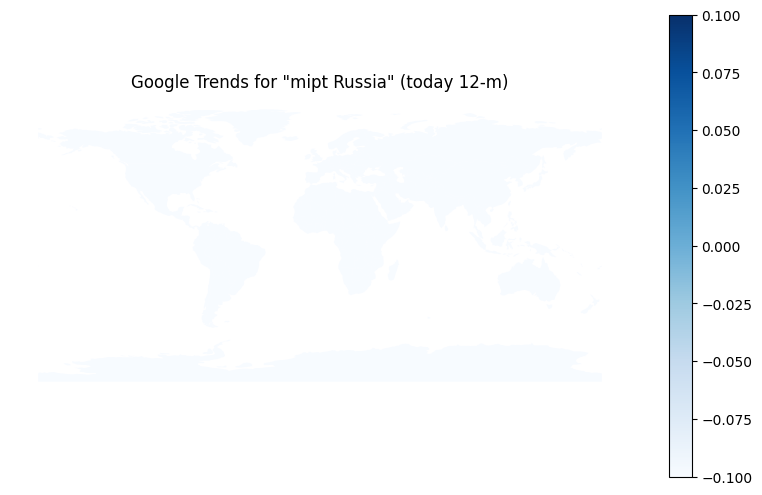

In [76]:
timeframe = 'today 12-m'
keyword = sql_data[8][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\3122429321.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



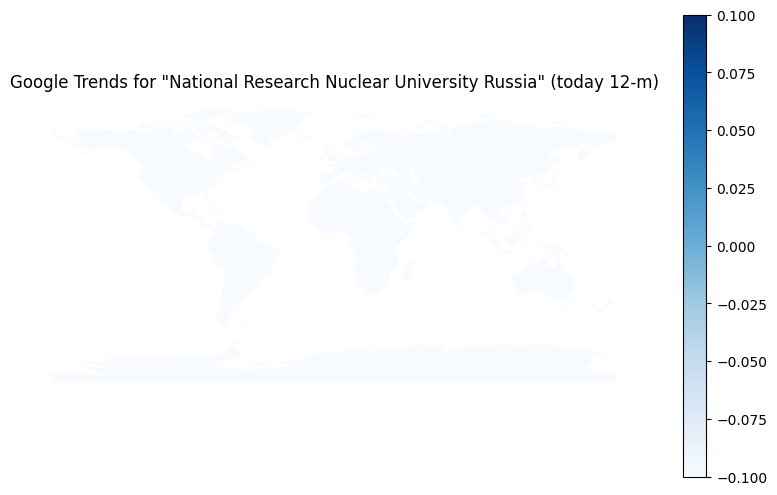

In [77]:
timeframe = 'today 12-m'
keyword = sql_data[9][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\2601618980.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



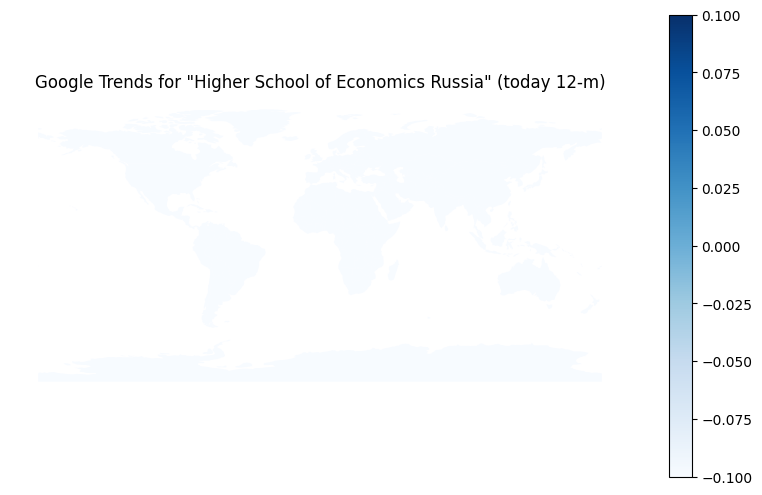

In [78]:
timeframe = 'today 12-m'
keyword = sql_data[10][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

C:\Users\krezn\AppData\Local\Temp\ipykernel_21476\2050079194.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



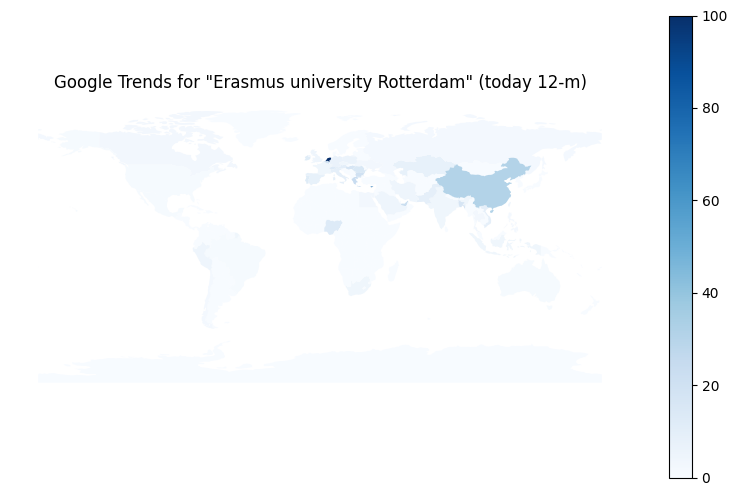

In [79]:
timeframe = 'today 12-m'
keyword = sql_data[11][1]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo='')
data = pytrends.interest_by_region()
interest_over_time_df = pytrends.interest_over_time()
data = data.rename(index={"United States": "United States of America"})
# Меняем название 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(data, how='left', left_on='name', right_index=True)
world = world.fillna(0)
world.plot(column=keyword, cmap='Blues', legend=True, figsize=(10, 6))
plt.title(f'Google Trends for "{keyword}" ({timeframe})')
plt.axis('off')
fig = plt.gcf()

In [ ]:
# закрываем коннект к БД
cursor.close()
cnx.close()

In [90]:
# В целом подводя итог можно сказать что интерес к университетам стабильно держится примерно все время
# и незначительно подрастает во время приемных кампаний
# Так же можно сказать что Наиболее популярны в мире американские университеты тк к ним испытывается наибольший интерес
# судя по поисковым запросам
# Для того чтобы быстро проверить другие гипотезы и теории в удобном интерфейсе можно использовать
# Созданное мной стримлит приложение app.py благодаря нему можно быстро изучить динамику трендов
# даже по нескольким странам и по миру и по любым запросам (не только университеты как тут)

# для этого прочтите ридми и запустите приложение командой из ридми